In [ ]:
! pip install -q kaggle

In [ ]:
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aveshuddin","key":"9ffdf70321b9c2b44c88b12e3cddc686"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          19286        389  0.9411765        
sahirmaharajj/electric-vehicle-population-size-2024         Electric Vehicle Population by Country (2024)  275KB  2024-03-30 19:16:06           1139         34  1.0              
mexwell/drug-consumption-classification                     💊 Drug Consumption Classification               56KB  2024-03-28 15:02:22           1608         34  1.0              
bhavikjikadara/student-study-performance                    Student Study Performance                    

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D, Dropout
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Check available physical GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')

# Set memory growth for GPUs if available
if gpus:
    # Set memory growth for the first GPU
    tf.config.experimental.set_memory_growth(gpus[0], True)
else:
    print("No GPUs detected. Running on CPU.")

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d sshikamaru/fruit-recognition
!unzip fruit-recognition.zip

train_dir='/content/train/train'
test_dir='/content/test/test'
print(os.listdir(train_dir))
print(os.listdir(test_dir))

Streaming output truncated to the last 5000 lines.
  inflating: train/train/Pepper Green/Pepper Green_266.jpg  
  inflating: train/train/Pepper Green/Pepper Green_267.jpg  
  inflating: train/train/Pepper Green/Pepper Green_268.jpg  
  inflating: train/train/Pepper Green/Pepper Green_269.jpg  
  inflating: train/train/Pepper Green/Pepper Green_27.jpg  
  inflating: train/train/Pepper Green/Pepper Green_270.jpg  
  inflating: train/train/Pepper Green/Pepper Green_271.jpg  
  inflating: train/train/Pepper Green/Pepper Green_272.jpg  
  inflating: train/train/Pepper Green/Pepper Green_273.jpg  
  inflating: train/train/Pepper Green/Pepper Green_274.jpg  
  inflating: train/train/Pepper Green/Pepper Green_275.jpg  
  inflating: train/train/Pepper Green/Pepper Green_276.jpg  
  inflating: train/train/Pepper Green/Pepper Green_277.jpg  
  inflating: train/train/Pepper Green/Pepper Green_278.jpg  
  inflating: train/train/Pepper Green/Pepper Green_279.jpg  
  inflating: train/train/Pepper Gre

In [ ]:
class_count=[]
for i in os.listdir(train_dir):
    class_count.append(i)
class_count

['Apricot',
 'Kiwi',
 'Pepper Red',
 'Cucumber Ripe',
 'Cantaloupe',
 'Potato Red',
 'Apple Granny Smith',
 'Avocado',
 'Pear',
 'Passion Fruit',
 'Watermelon',
 'Mango',
 'Papaya',
 'Pomegranate',
 'Plum',
 'Tomato',
 'Peach',
 'Orange',
 'Pepper Green',
 'Clementine',
 'Blueberry',
 'Strawberry',
 'Raspberry',
 'Grape Blue',
 'Cactus fruit',
 'Pineapple',
 'Onion White',
 'Corn',
 'Limes',
 'Apple Braeburn',
 'Banana',
 'Lemon',
 'Cherry']

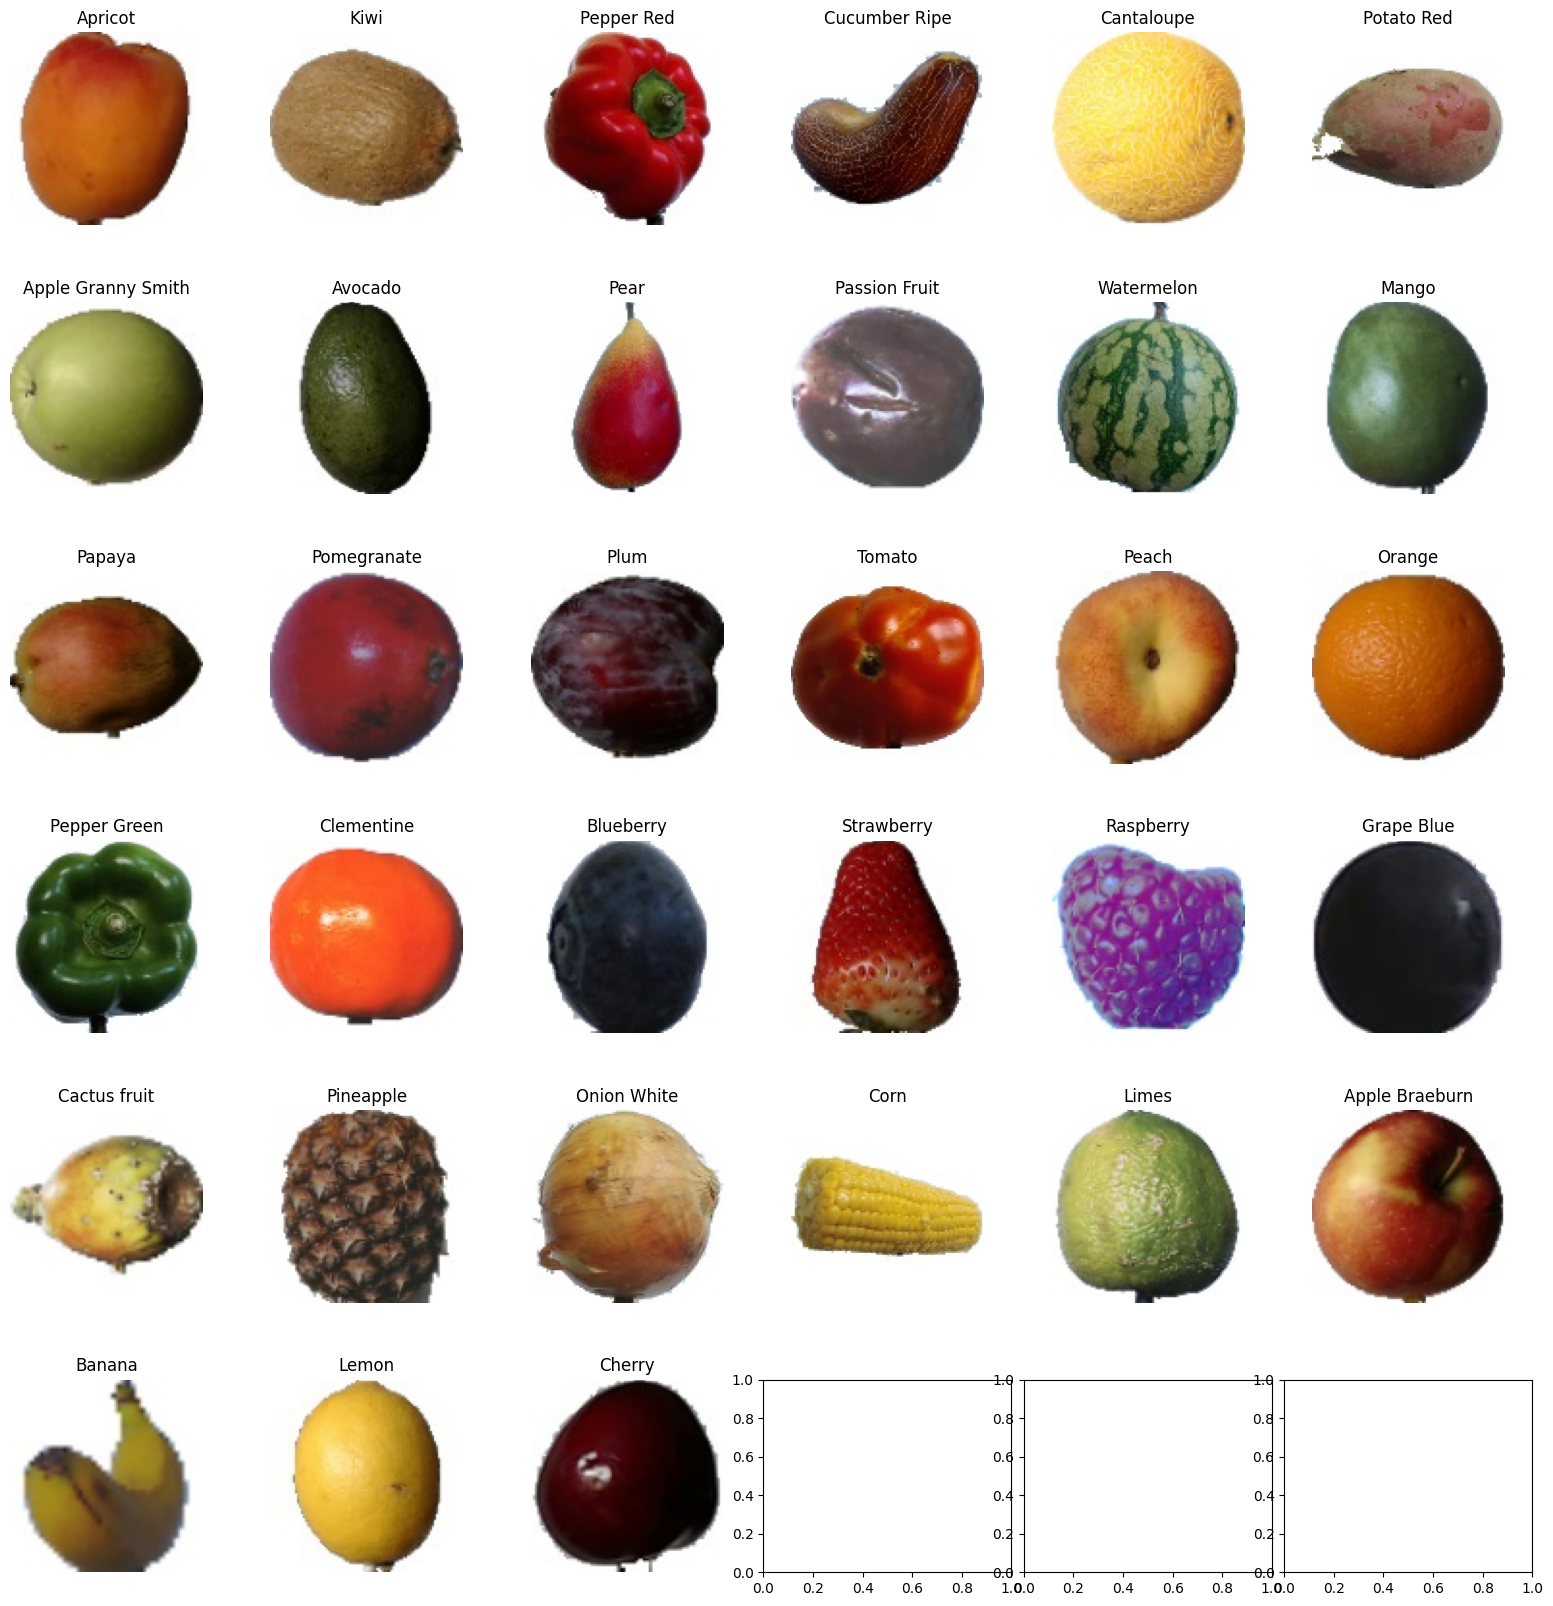

In [ ]:
fig, axs = plt.subplots(6,6, figsize=(20,20))
axs = axs.ravel()
for i, cla in enumerate(class_count):
    class_dir = os.path.join(train_dir, cla)
    if os.path.isdir(class_dir):
        files = os.listdir(class_dir)
        if len(files) > 0:
            file_path = os.path.join(class_dir, files[0])
            img = mpimg.imread(file_path)
            axs[i].imshow(img)
            axs[i].set_title(cla)
            axs[i].axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.4)
plt.show()

In [ ]:
img_gen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,rotation_range=60,
                          zoom_range=0.5,
                          width_shift_range=0.15,
                          height_shift_range=0.15,
                          validation_split=0.2)
train_data=img_gen.flow_from_directory(train_dir,shuffle=True,subset='training',batch_size=100,target_size=(128,128))
valid_data=img_gen.flow_from_directory(train_dir,subset='validation',batch_size=100,target_size=(128,128))

Found 13493 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.


inside plot section


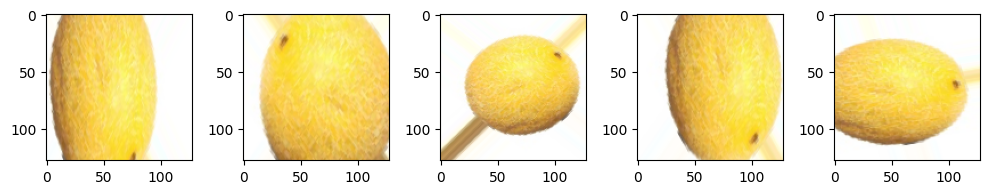

In [ ]:
print('inside plot section')
def plotimages(images_arr):
    fig, axes=plt.subplots(1,5,figsize=(10,10))
    axes=axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
aug_img=[train_data[134][0][3] for i in range(5)]
plotimages(aug_img)

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))
for layer in vgg_model.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(33, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_data, epochs=10, validation_data=valid_data)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
135/135 [==============================] - 121s 814ms/step - loss: 2.1362 - accuracy: 0.4058 - val_loss: 1.0061 - val_accuracy: 0.7905
Epoch 2/10
135/135 [==============================] - 79s 582ms/step - loss: 1.1255 - accuracy: 0.6587 - val_loss: 0.5352 - val_accuracy: 0.8786
Epoch 3/10
135/135 [==============================] - 80s 593ms/step - loss: 0.8074 - accuracy: 0.7505 - val_loss: 0.4150 - val_accuracy: 0.9066
Epoch 4/10
135/135 [==============================] - 79s 586ms/step - loss: 0.6797 - accuracy: 0.7837 - val_loss: 0.3082 - val_accuracy: 0.9345
Epoch 5/10
135/135 [==============================] - 79s 586ms/step - loss: 0.5744 - accuracy: 0.8172 - val_loss: 0.2529 - val_accuracy: 0.9426
Epoch 6/10
135/135 [==============================] - 80s 595ms/step - loss: 0.5100 - accuracy: 0.8372 - val_loss: 0.2243 - val_accuracy: 0.9494
Epoch 7/10
135/135 [==============================] - 85s 630ms/

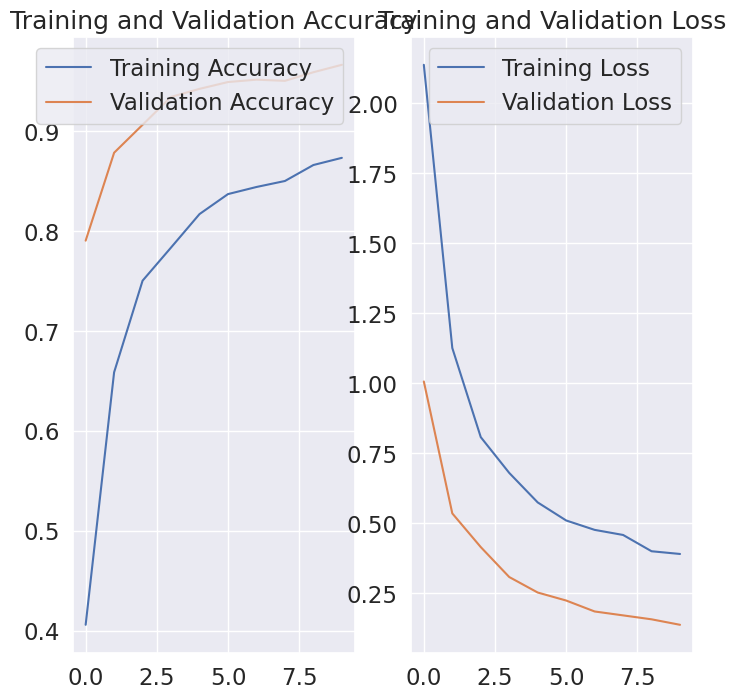

In [ ]:
if 'accuracy' in history.history:
  acc_key = 'accuracy'
  val_acc_key = 'val_accuracy'
else:
  acc_key = 'acc'
  val_acc_key = 'val_acc'

acc = history.history[acc_key]
val_acc = history.history[val_acc_key]

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")
plt.show()